<a href="https://colab.research.google.com/github/Bhanukoya/Masters-Project/blob/master/Concrete_R2plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_excel('drive/My Drive/Concrete_Data.xls', sheet_name='Sheet1')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
df.columns = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "Compressive_Strength"]

In [ ]:
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
x = df.iloc[ :, : -1]
y = df.Compressive_Strength

In [ ]:
x

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [ ]:
from sklearn.preprocessing import StandardScaler

from math import sqrt

from sklearn.metrics import r2_score ,accuracy_score, precision_score, mean_squared_error

ss = StandardScaler()

x = ss.fit_transform(x)

x

array([[ 2.47791782, -0.85688631, -0.84713204, ...,  0.86316012,
        -1.21765845, -0.27973311],
       [ 2.47791782, -0.85688631, -0.84713204, ...,  1.05617041,
        -1.21765845, -0.27973311],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -0.52651395,
        -2.24091255,  3.55306569],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ..., -1.03606111,
         0.08012724, -0.27973311],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.21464556,
         0.19118775, -0.27973311],
       [-0.19401043,  0.30850389,  0.37696733, ..., -1.39506025,
        -0.15072887, -0.27973311]])

## Neural Networks

In [ ]:
import tensorflow
from math import sqrt
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D


mean_r2_scores = []
mean_rmse_scores = []

for k in range(1, 101):

  kf = KFold(n_splits=10, shuffle=True, random_state=k)

  r2_scores =[]
  mse_scores = []

  for i,j in kf.split(x):

    x_train, y_train, x_test, y_test = x[i] , y[i], x[j], y[j]

    model = Sequential()

    model.add(Dense(units=64, activation="relu", input_shape=(8, )))

    model.add(Dense(128, activation='relu'))

    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(x_train, y_train ,epochs=100 ,verbose=1)

    y_pred = model.predict(x_test)

    mse_scores.append(model.evaluate(x_test,y_test))
  
    r2_scores.append(r2_score(y_test, y_pred))

  rmse_scores = np.sqrt(mse_scores)
  print('r2 scores for ', k ,'iteration :',r2_scores)
  print('rmse scores for ', k ,'iteration :',rmse_scores)
  print('mean r2 score for ', k ,'iteration :',np.mean(r2_scores))
  print('mean rmse score for ', k ,'iteration :', np.mean(rmse_scores), '\n')


  mean_r2_scores.append(np.mean(r2_scores))
  mean_rmse_scores.append(np.mean(rmse_scores))


Streaming output truncated to the last 5000 lines.
Epoch 76/100
927/927 [==============================] - 0s 55us/step - loss: 27.8334
Epoch 77/100
927/927 [==============================] - 0s 50us/step - loss: 27.2030
Epoch 78/100
927/927 [==============================] - 0s 50us/step - loss: 26.7248
Epoch 79/100
927/927 [==============================] - 0s 51us/step - loss: 26.4982
Epoch 80/100
927/927 [==============================] - 0s 65us/step - loss: 26.6259
Epoch 81/100
927/927 [==============================] - 0s 48us/step - loss: 26.2407
Epoch 82/100
927/927 [==============================] - 0s 55us/step - loss: 26.0552
Epoch 83/100
927/927 [==============================] - 0s 51us/step - loss: 26.1285
Epoch 84/100
927/927 [==============================] - 0s 47us/step - loss: 25.6375
Epoch 85/100
927/927 [==============================] - 0s 50us/step - loss: 25.4071
Epoch 86/100
927/927 [==============================] - 0s 49us/step - loss: 25.1474
Epoch 87/100
9

In [ ]:
plt.hist(mean_r2_scores)

In [ ]:
plt.hist(mean_rmse_scores)

## Slump dataset 2

In [ ]:
df = pd.read_csv('Slump_data_dataset2.csv', index_col='Mixture')
df

,cement,%RCA,Slump,experimental cs
Mixture,,,,
mix 1,300,0,5.0,21.10
mix 2,300,0,12.0,17.10
mix 3,300,100,5.0,15.98
mix 4,300,100,12.0,15.00
mix 5,400,0,5.0,33.16
mix 6,400,0,12.0,28.04
mix 7,400,100,5.0,25.52
mix 8,400,100,12.0,21.53
mix 9,300,50,8.5,16.83


In [ ]:
x = df.iloc[: , :-1]
y = df['experimental cs']
x , y

(         cement  %RCA  Slump
 Mixture                     
 mix 1       300     0    5.0
 mix 2       300     0   12.0
 mix  3      300   100    5.0
 mix 4       300   100   12.0
 mix 5       400     0    5.0
 mix 6       400     0   12.0
 mix 7       400   100    5.0
 mix 8       400   100   12.0
 mix 9       300    50    8.5
 mix 10      400    50    8.5
 mix 11      350     0    8.5
 mix 12      350   100    8.5
 mix 13      350    50    5.0
 mix 14      350    50   12.0
 mix 15      350    50    8.5
 mix 16      350    50    8.5
 mix 17      350    50    8.5, Mixture
 mix 1     21.10
 mix 2     17.10
 mix  3    15.98
 mix 4     15.00
 mix 5     33.16
 mix 6     28.04
 mix 7     25.52
 mix 8     21.53
 mix 9     16.83
 mix 10    24.88
 mix 11    22.62
 mix 12    18.56
 mix 13    21.23
 mix 14    18.36
 mix 15    18.60
 mix 16    17.86
 mix 17    18.60
 Name: experimental cs, dtype: float64)

In [ ]:
cormat = df.corr()

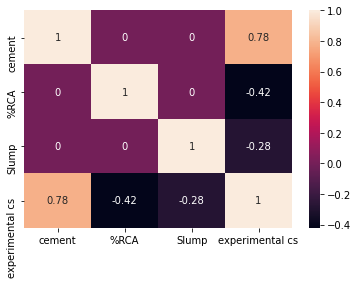

In [ ]:
sns.heatmap(cormat, annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
x = ss.fit_transform(x)
x

array([[-1.30384048, -1.30384048, -1.30384048],
       [-1.30384048, -1.30384048,  1.30384048],
       [-1.30384048,  1.30384048, -1.30384048],
       [-1.30384048,  1.30384048,  1.30384048],
       [ 1.30384048, -1.30384048, -1.30384048],
       [ 1.30384048, -1.30384048,  1.30384048],
       [ 1.30384048,  1.30384048, -1.30384048],
       [ 1.30384048,  1.30384048,  1.30384048],
       [-1.30384048,  0.        ,  0.        ],
       [ 1.30384048,  0.        ,  0.        ],
       [ 0.        , -1.30384048,  0.        ],
       [ 0.        ,  1.30384048,  0.        ],
       [ 0.        ,  0.        , -1.30384048],
       [ 0.        ,  0.        ,  1.30384048],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

In [ ]:
import tensorflow

In [ ]:
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(512,activation='relu' ,input_shape=(3, )))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))

model.add(Dense(1,))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x, y , epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 8ms/step - loss: 458.8954
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 429.7719
Epoch 3/100
17/17 [==============================] - 0s 1ms/step - loss: 396.8720
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 352.2517
Epoch 5/100
17/17 [==============================] - 0s 1ms/step - loss: 293.1256
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 225.1489
Epoch 7/100
17/17 [==============================] - 0s 1ms/step - loss: 150.7477
Epoch 8/100
17/17 [==============================] - 0s 1ms/step - loss: 92.0880
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 74.6021
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 107.3661
Epoch 11/100
17/17 [==============================] - 0s 2ms/step - loss: 135.2451
Epoch 12/100
17/17 [==============================] - 0s 2ms/step - loss: 124.1690
Epoch 13/100
17

In [ ]:
model.evaluate(x, y)

17/17 [==============================] - 0s 281us/step


0.24710290133953094

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y, model.predict(x))

0.9884512230096003

In [ ]:
mean_squared_error(y, model.predict(x))

0.24710299527507537

In [ ]:
model.predict(x)

array([[21.261734],
       [17.409933],
       [16.48673 ],
       [15.588748],
       [33.09681 ],
       [28.061443],
       [25.670555],
       [21.870453],
       [16.138111],
       [25.255966],
       [22.620037],
       [17.153976],
       [21.102234],
       [17.781136],
       [18.432219],
       [18.432219],
       [18.432219]], dtype=float32)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
clf = RandomForestRegressor(n_estimators=200)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
clf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
clf.score(x_test, y_test)

0.590862699598828

In [ ]:
clf.score(x_train, y_train)

0.9274840169243996

In [ ]:
cross_val_score(RandomForestRegressor(n_estimators=200), x,y, cv=8 )

array([ -0.74073794,   0.70669545,  -0.04449211,  -0.74759488,
       -13.48228814,  -1.20608404,   0.41663567,  -4.19751499])